In [ ]:
"""
A1. Evaluate the intraclass spread and interclass distances between the classes in your dataset. If 
your data deals with multiple classes, you can take any two classes. Steps below (refer below 
diagram for understanding):
• Calculate the mean for each class (also called as class centroid)
(Suggestion: You may use numpy.mean() function for finding the average vector for all 
vectors in a given class. Please define the axis property appropriately to use this function. EX: 
feat_vecs.mean(axis=0))
• Calculate spread (standard deviation) for each class
(Suggestion: You may use numpy.std() function for finding the standard deviation vector 
for all vectors in a given class. Please define the axis property appropriately to use this 
function.)
• Calculate the distance between mean vectors between classes
(Suggestion: numpy.linalg.norm(centroid1 – centroid2) gives the Euclidean 
distance between two centroids.
"""

In [26]:
import pandas as pd
# loading data into csv file
neo_data = pd.read_csv("C:\\Users\\everybody\\Downloads\\neo.csv\\neo.csv")
neo_data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True
...,...,...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,Earth,False,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,Earth,False,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,Earth,False,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,Earth,False,27.80,False


In [27]:
#finding the datatypes for all objects
neo_data.dtypes

id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
orbiting_body          object
sentry_object            bool
absolute_magnitude    float64
hazardous                bool
dtype: object

In [28]:
#dropping the sentry_object column as its cardinality is 1
neo_data.drop(columns=['sentry_object','orbiting_body'],inplace=True)
neo_data

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
...,...,...,...,...,...,...,...,...
90831,3763337,(2016 VX1),0.026580,0.059435,52078.886692,1.230039e+07,25.00,False
90832,3837603,(2019 AD3),0.016771,0.037501,46114.605073,5.432121e+07,26.00,False
90833,54017201,(2020 JP3),0.031956,0.071456,7566.807732,2.840077e+07,24.60,False
90834,54115824,(2021 CN5),0.007321,0.016370,69199.154484,6.869206e+07,27.80,False


In [29]:
hazardous_data =  neo_data[neo_data['hazardous']]
non_hazardous_data = neo_data[~neo_data['hazardous']]
hazardous_data


,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude,hazardous
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,20.00,True
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,20.09,True
10,54049873,(2020 OT6),0.252671,0.564989,58430.697200,3.833750e+07,20.11,True
23,2506491,506491 (2003 UW29),0.201630,0.450858,115899.180498,1.510102e+07,20.60,True
27,3781344,(2017 RV),0.110804,0.247765,48655.305132,3.279775e+07,21.90,True
...,...,...,...,...,...,...,...,...
90782,3776295,(2017 NH),0.133216,0.297879,67595.756852,5.681059e+07,21.50,True
90794,54235530,(2022 AY1),0.104847,0.234444,51149.696785,5.450002e+07,22.02,True
90811,2138404,138404 (2000 HA24),0.356907,0.798068,33008.617883,7.189835e+07,19.36,True
90812,2377732,377732 (2005 XJ8),1.034082,2.312278,53362.798148,4.756627e+07,17.05,True


In [30]:
#Q1 part 1 ans:
#mean vector for hazardous-data but normalize first
import numpy as np
hazardous_numpy = hazardous_data.to_numpy()
hazardous_mean_vector = np.mean(hazardous_numpy[:,[2,3,4,5,7]],axis=0)

print(f"hazardous_mean_vector:{hazardous_mean_vector}")

#mean vector for non-hazardous data but normalizing data first
non_hazardous_numpy = non_hazardous_data.to_numpy()
non_hazardous_mean_vector = np.mean(non_hazardous_numpy[:,[2,3,4,5,7]],axis=0)
print(f"Non hazardous mean vector:{non_hazardous_mean_vector}")




hazardous_mean_vector:[0.2941340690233259 0.6577037728328301 62794.33702476359
 39946230.208184496 1.0]
Non hazardous mean vector:[0.10945994486417701 0.24475987752835074 46479.15395268114
 36756086.88447082 0.0]


In [17]:
#Part2: Finding the standard deviation vector
#ensuring that all the columns have numeric values
for column in ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']:
    hazardous_data.loc[:, column] = pd.to_numeric(hazardous_data[column], errors='coerce')

#for non-hazardous columns
for column in ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']:
    non_hazardous_data.loc[:, column] = pd.to_numeric(non_hazardous_data[column], errors='coerce')

In [16]:
#finding data types for hazardous and non hazardous dataframes
print(f"For hazardous data frame")
print(hazardous_data.dtypes)

print(f"For non hazardous data frames")
print(non_hazardous_data.dtypes)

For hazardous data frame
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object
For non hazardous data frames
id                      int64
name                   object
est_diameter_min      float64
est_diameter_max      float64
relative_velocity     float64
miss_distance         float64
absolute_magnitude    float64
hazardous                bool
dtype: object


In [19]:
#Remove rows with NaN values in the selected columns
hazardous_cleaned = hazardous_data.dropna(subset=['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude'])

#Remove rows with NaN values in the selected columns
non_hazardous_cleaned = non_hazardous_data.dropna(subset=['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude'])

# Select only the numeric columns for the NumPy array
hazardous_numpy_cleaned = hazardous_cleaned[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].to_numpy()

# Select only the numeric columns for the NumPy array
non_hazardous_numpy_cleaned = non_hazardous_cleaned[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']].to_numpy()

In [20]:
#Q1 Part 2 answer
hazardous_std_vector = np.std(hazardous_numpy_cleaned, axis=0)
print(f"Hazardous standard deviation vector: {hazardous_std_vector}")

non_hazardous_std_vector = np.std(non_hazardous_numpy_cleaned,axis=0)
print(f"Non hazardous standard deviation vector: {non_hazardous_std_vector}")

Hazardous standard deviation vector: [2.97082544e-01 6.64296763e-01 2.71735730e+04 2.11176401e+07
 1.34160011e+00]


array([2.93053956e-01, 6.55288566e-01, 2.45601850e+04, 2.24589002e+07,
       2.80118192e+00])

In [21]:
#Q1 part 3: calculating the mean distance between the two vectors:
distance = np.linalg.norm(hazardous_mean_vector - non_hazardous_mean_vector)
print(f"Euclidean distance between points:{distance}")

3190185.043384602


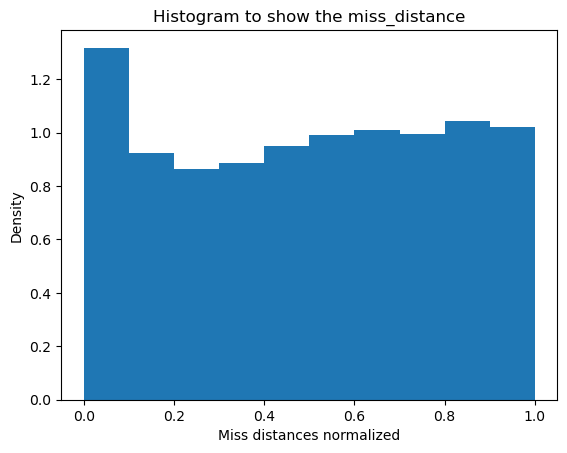

In [42]:
"""
Question 2
Take any feature from your dataset. Observe the density pattern for that feature by plotting the 
histogram. Use buckets (data in ranges) for histogram generation and study. Calculate the mean and 
variance from the available data. 
"""
import matplotlib.pyplot as plt
#choosing estimated_diameter_max as my feature
feat_chosen = neo_data['miss_distance']
feat_chosen_normalized = (feat_chosen - feat_chosen.min())/(feat_chosen.max() - feat_chosen.min())
feat_chosen_normalized.head()
plt.hist(feat_chosen_normalized,bins=10,density=True)
plt.title("Histogram to show the miss_distance")
plt.xlabel("Miss distances normalized")
plt.ylabel("Density")
plt.show()


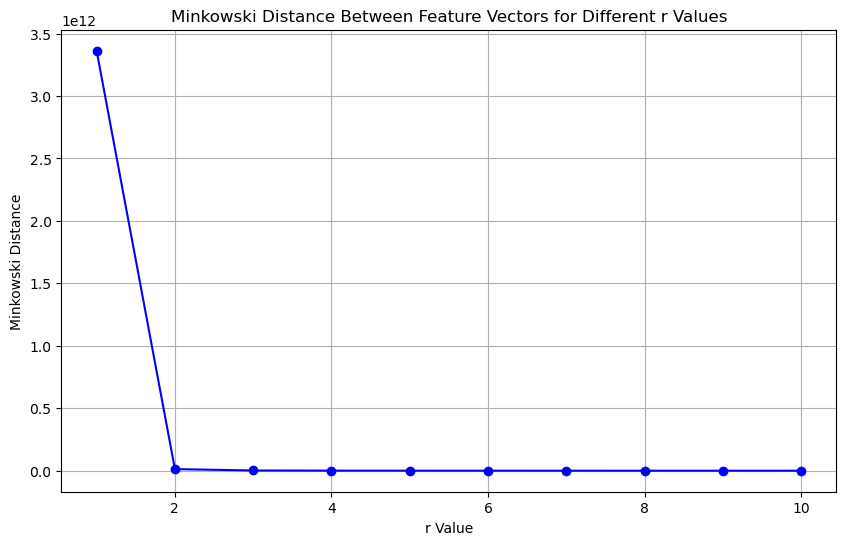

In [45]:
"""
Question 3:
. Take any two feature vectors from your dataset. Calculate the Minkwoski distance with r from 1 
to 10. Make a plot of the distance and observe the nature of this graph.
"""
#taking relative velocity and miss_distance
vector1 = neo_data['relative_velocity'].values
vector2 = neo_data['miss_distance'].values

def minkowski_distance(x, y, r):
    return np.sum(np.abs(x - y)**r)**(1/r)

r_values = range(1, 11)

# Calculate distances for each r
distances = [minkowski_distance(vector1, vector2, r) for r in r_values]
plt.figure(figsize=(10, 6))
plt.plot(r_values, distances, marker='o', linestyle='-', color='b')
plt.title('Minkowski Distance Between Feature Vectors for Different r Values')
plt.xlabel('r Value')
plt.ylabel('Minkowski Distance')
plt.grid(True)
plt.show()


In [63]:
"""
Question 4:
Divide dataset in your project into two parts – train & test set. 
To accomplish this, use the traintest_split() function available in SciKit
"""
#first normalizing the values of the dataset
final_neo_data = neo_data[['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']]

#ensuring that the values are numeric:
for column in ['est_diameter_min', 'est_diameter_max', 'relative_velocity', 'miss_distance', 'absolute_magnitude']:
    final_neo_data.loc[:,column] = pd.to_numeric(final_neo_data[column], errors='coerce')

#normalizing the values using min max normalization
final_neo_data = (final_neo_data - final_neo_data.min())/(final_neo_data.max() - final_neo_data.min())
#adding the hazardous column as that's our target
final_neo_data['hazardous'] = neo_data['hazardous']

In [64]:
#splitting the dataset into training and testing
from sklearn.model_selection import train_test_split
#preparing features and target
X = final_neo_data.drop(columns='hazardous')
y = final_neo_data['hazardous']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (63585, 5)
Testing set size: (27251, 5)


In [65]:
"""
Question 5:
Train a kNN classifier (k=3) using the training set obtained from above exercise.
"""
from sklearn.neighbors import KNeighborsClassifier
#setting your K value to 3, so that the machine can learn from the three nearest neoghbors
neigh = KNeighborsClassifier(n_neighbors=3)

#fitting the number of neighbors onto your dataset
neigh.fit(X, y)



KNeighborsClassifier(n_neighbors=3)

In [71]:
"""
Question 6: Testing the model and showing its accuracy report
"""
from sklearn.metrics import accuracy_score

# Predicting the classes for the test data
y_pred = neigh.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the model:", accuracy)


Accuracy of the model: 0.944442405783274


In [73]:
"""
Question 7
Studying the prediction behavior.Perform classification for a given vector using neigh.predict(<<test_vect>>). This shall produce the 
class of the test vector (test_vect is any feature vector from your test set).
"""
neigh.predict(X_test)

#creating a test vector
test_vect = X_test.iloc[0:1]

#Using the trained k-NN classifier 'neigh'
predicted_class = neigh.predict(test_vect)
print("Predicted class for the test vector:", predicted_class)


Predicted class for the test vector: [False]


In [74]:
#plotting the graph for the values of k from 1 to 11
#setting the range values
k_values = range(1, 12)  # k from 1 to 11
accuracies = []
for k in k_values:
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)
    print(f"Accuracy for k={k}: {accuracy}")

Accuracy for k=1: 0.8840042567245239
Accuracy for k=2: 0.903159517081942
Accuracy for k=3: 0.8917470918498404
Accuracy for k=4: 0.9035264760926205
Accuracy for k=5: 0.8960772081758468
Accuracy for k=6: 0.9051410957396059
Accuracy for k=7: 0.9004807163039888
Accuracy for k=8: 0.9058750137609629
Accuracy for k=9: 0.9017650728413636
Accuracy for k=10: 0.9055447506513522
Accuracy for k=11: 0.9030127334776705


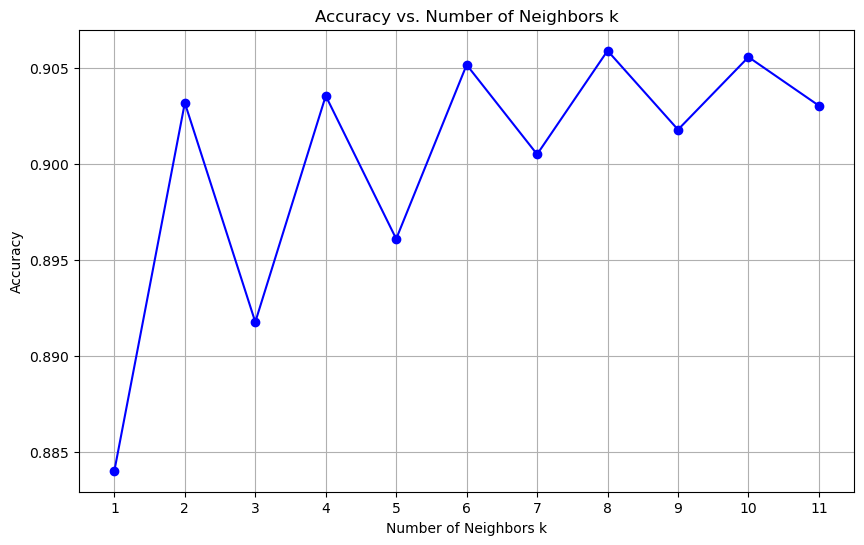

In [75]:
# Plotting the accuracy vs k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Number of Neighbors k')
plt.xlabel('Number of Neighbors k')
plt.ylabel('Accuracy')
plt.xticks(k_values)  # Ensure all k values are marked
plt.grid(True)
plt.show()

In [77]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [79]:
"""
Please evaluate confusion matrix for your classification problem. From confusion matrix, the 
other performance metrics such as precision, recall and F1-Score measures for both training and test 
data. Based on your observations, infer the models learning outcome (underfit / regularfit / overfit).

"""
k = 3  
classifier = KNeighborsClassifier(n_neighbors=k)
classifier.fit(X_train, y_train)

# Predictions
y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

# Accuracy to check for overfitting/underfitting
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

# Confusion matrices
cm_train = confusion_matrix(y_train, y_pred_train)
cm_test = confusion_matrix(y_test, y_pred_test)

# Classification reports
report_train = classification_report(y_train, y_pred_train)
report_test = classification_report(y_test, y_pred_test)

print("Training Confusion Matrix:\n", cm_train)
print("Test Confusion Matrix:\n", cm_test)
print("\nTraining Classification Report:\n", report_train)
print("\nTest Classification Report:\n", report_test)


# Summary of performance and model fit
print(f"Training Accuracy: {accuracy_train}")
print(f"Test Accuracy: {accuracy_test}")

# Determine model fit based on accuracies
if accuracy_train > 0.95 and (accuracy_train - accuracy_test) > 0.05:
    print("Model might be overfitting.")
elif accuracy_train < 0.7 and accuracy_test < 0.7:
    print("Model might be underfitting.")
else:
    print("Model is likely well-fitted (regular fit).")

Training Confusion Matrix:
 [[56297  1102]
 [ 2520  3666]]
Test Confusion Matrix:
 [[23420  1177]
 [ 1773   881]]

Training Classification Report:
               precision    recall  f1-score   support

       False       0.96      0.98      0.97     57399
        True       0.77      0.59      0.67      6186

    accuracy                           0.94     63585
   macro avg       0.86      0.79      0.82     63585
weighted avg       0.94      0.94      0.94     63585


Test Classification Report:
               precision    recall  f1-score   support

       False       0.93      0.95      0.94     24597
        True       0.43      0.33      0.37      2654

    accuracy                           0.89     27251
   macro avg       0.68      0.64      0.66     27251
weighted avg       0.88      0.89      0.89     27251

Training Accuracy: 0.9430368797672407
Test Accuracy: 0.8917470918498404
Model is likely well-fitted (regular fit).
